In [1]:
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import sys 
import matplotlib

# Enable inline plotting
%matplotlib inline

# Creata a Data Set

In [2]:
# The initial set of baby names
names = ['Bob', 'Jessica', 'Mary', 'John', 'Mel']

In [3]:
# This will ensure the random samples below can be reproduced. 
# This means the random samples will always be identical.

random.seed?

In [4]:
random.randint?

In [5]:
random.seed(500)
random_names = [names[random.randint(low=0, high=len(names))] for i in range(1000)]
# print the first 10 records
print(len(random_names))
random_names[:10]

1000


['Mary',
 'Jessica',
 'Jessica',
 'Bob',
 'Jessica',
 'Jessica',
 'Jessica',
 'Mary',
 'Mary',
 'Mary']

Generate a random numbers between 0 and 1000

In [6]:
# The number of births per name for the year 1880
births = [random.randint(low=0, high=1000) for i in range(1000)]
# first 10 records
births[:10]

[968, 155, 77, 578, 973, 124, 155, 403, 199, 191]

Merge the names and the births data set using the zip function

In [7]:
BabyDataSet = list(zip(random_names, births))
BabyDataSet[:10]

[('Mary', 968),
 ('Jessica', 155),
 ('Jessica', 77),
 ('Bob', 578),
 ('Jessica', 973),
 ('Jessica', 124),
 ('Jessica', 155),
 ('Mary', 403),
 ('Mary', 199),
 ('Mary', 191)]

Create a data frame

In [8]:
df = pd.DataFrame(data = BabyDataSet, columns = ['Names', 'Births'])
# View the first 10 records
df[:10]

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973
5,Jessica,124
6,Jessica,155
7,Mary,403
8,Mary,199
9,Mary,191


In [9]:
%pwd


'C:\\Users\\rejalu1\\OneDrive - Henry Ford Health System\\DSC478MachineLearning\\Notebooks\\week2'

In [10]:
df.to_csv('../../data/births1880.txt', index=False, header=False)

Get the data from the file system

In [11]:
Location = r'../../data/births1880.txt'
df = pd.read_csv(Location)
df


,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124
...,...,...
994,John,151
995,Jessica,511
996,John,756
997,Jessica,294


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mary    999 non-null    object
 1   968     999 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [13]:
df.head() # this returns the top five records

,Mary,968
0,Jessica,155
1,Jessica,77
2,Bob,578
3,Jessica,973
4,Jessica,124


In [14]:
# Since there is header column in the file, we need to set the header parameter to None
df = pd.read_csv(Location, header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1000 non-null   object
 1   1       1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [15]:
# look at the last five records of the data frame
df.tail()

,0,1
995,John,151
996,Jessica,511
997,John,756
998,Jessica,294
999,John,152


if we wanted to give specific column names, we would have to pass anaother parameter called names

In [16]:
df = pd.read_csv(Location, names=['Names', 'Births'])
df.head(5)

,Names,Births
0,Mary,968
1,Jessica,155
2,Jessica,77
3,Bob,578
4,Jessica,973


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Names   1000 non-null   object
 1   Births  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


Delete the file now that we are done using it

In [18]:
import os
os.remove(Location)

Prepare the data

In [19]:
# find all unique values of the name column
# Method 1
df['Names'].unique()

array(['Mary', 'Jessica', 'Bob', 'John', 'Mel'], dtype=object)

In [20]:
# if you wanted to print the unique values
for x in df['Names'].unique():
    print(x)

Mary
Jessica
Bob
John
Mel


In [21]:
# Method 2
print(df['Names'].describe())

count     1000
unique       5
top        Bob
freq       206
Name: Names, dtype: object


In [23]:
# Create a groupby object
name = df.groupby('Names')

# Apply the sum function to the group by object
df1 = name.sum()
df1

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


In [24]:
# We could also do the groupby and sum in one line()
df = df.groupby('Names').sum()
df

,Births
Names,
Bob,106817
Jessica,97826
John,90705
Mary,99438
Mel,102319


Analyze Data

Find the most popular name or the baby name with the highest birth rate

In [27]:
# Method 1
# Sort the dataframe and select the top row
sorted = df.sort_values(['Births'], ascending=False)
sorted.head(1)

,Births
Names,
Bob,106817


In [28]:
# Method 2
# Use the max() attribute to find the maximum value
df['Births'].max()

106817

# Present Data
Here we can plot the Births column and label the graph to show the end user the highest point on the graph. 
In conjunction with the table, the end user has a clear picture that Bob is the most popular baby name in the data set.

The most popular name


,Births
Names,
Bob,106817
Mel,102319
Mary,99438
Jessica,97826
John,90705


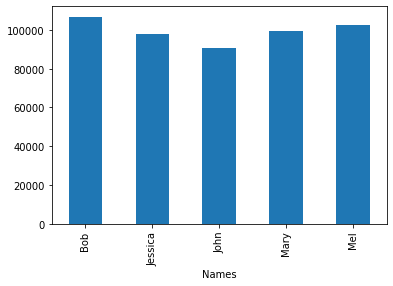

In [31]:
# Create the graph
df['Births'].plot.bar()
print('The most popular name')
df.sort_values(by='Births', ascending=False)